In [131]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

def game_analysis():
    ranking_board = {}
    winning_rate = []
    total_score = []
    avg_score = []
    i = 0
    with open ("Rank.csv") as csvfileR:
        rankReader = csv.reader(csvfileR)
        for row in rankReader:
            if not row[0] in ranking_board:
                ranking_board[row[0]] = [0, 0, 0, 0] # these datas in turn are total score, # of games won, drawn and lost
            
            if row[1] == 'X': #this is when the game is won
                ranking_board[row[0]][1] += 1 #number won += 1
                ranking_board[row[0]][0] += 1 #total score += 1
            elif row[1] == 'O': #this is when the game is lost
                ranking_board[row[0]][3] += 1 #number lost += 1
                ranking_board[row[0]][0] -= 1 #total score -= 1
            elif row[1] == None:
                ranking_board[row[0]][2] += 1 #number drawn += 1, total score does not change
            
            #prepare data to plot user "HeeJu"'s winning rate change 
            #user can be changed by switching "HeeJu" to row[i] or specifying the ID
            winning_rate.append(get_winning_rate("HeeJu", ranking_board))
            #prepare data to plot user "HeeJu"'s total score change
            #user can be changed by switching "HeeJu" to row[i] or specifying the ID
            total_score.append(ranking_board["HeeJu"][0])
            #prepare data to plot all users average score change
            users_total_score = 0
            users_avg_score = 0
            for i in ranking_board:
                users_total_score += ranking_board[i][0]
                users_avg_score = users_total_score / len(ranking_board)
            avg_score.append(users_avg_score)
            
    #####Analysis 1: plot user "HeeJu"'s winning rate change#####
    plt.plot(winning_rate)
    plt.xlabel('winning rate change(rounds)')
    plt.ylabel('(%)')
    plt.show()
    #####Analysis 2: plot user "HeeJu"'s total score change#####
    plt.plot(total_score)
    plt.xlabel('total score change(rounds)')
    plt.ylabel('(points)')
    plt.show()
    #####Analysis 3: plot average score of all users#####
    plt.plot(avg_score)
    plt.xlabel('global average score(rounds)')
    plt.ylabel('(points)')
    plt.show()

    return ranking_board

In [134]:
def get_winning_rate( player_id, ranking_board):
    total_games = ranking_board[player_id][1]+ranking_board[player_id][2]+ranking_board[player_id][3]
    if total_games != 0:
        winning_rate = ranking_board[player_id][1]/total_games
        winning_rate = round(winning_rate*100, 2)
    else:
        winning_rate = 0

    return winning_rate
    

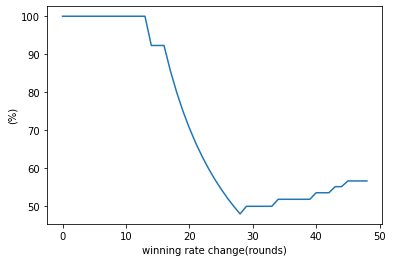

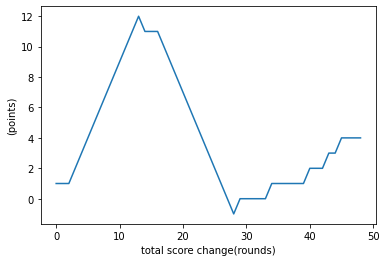

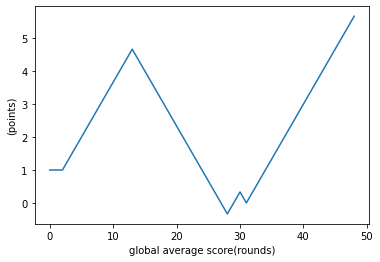

{'HeeJu': [4, 17, 0, 13], 'ABC': [2, 5, 0, 3], 'He': [11, 11, 0, 0]}

In [135]:
game_analysis()